In [52]:
# Import necessary libraries
import sys
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from PIL import Image
import seaborn as sns        # For statistical data visualization
import tensorflow as tf      # TensorFlow for deep learning
import random
# Import specific modules from TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense# Sequential model for building a linear stack of layers
  # Add any specific modules or layers you intend to use (e.g., Dense, Conv2D, etc.)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
sys.path.append('/Users/jordankanius/LHL_projects/Face2Face_Real_vs_Fake/functions/generator.py')

In [2]:
def create_df(state):
    var =  pd.read_csv(f'./Metadata/{state}.csv')
    return var

In [3]:
train_meta = create_df('train')
valid_meta = create_df('valid')
test_meta = create_df('test')

In [4]:
df_list = [train_meta, valid_meta, test_meta]
for x in df_list:
    print(x['label_str'].value_counts())

label_str
real    50000
fake    50000
Name: count, dtype: int64
label_str
real    10000
fake    10000
Name: count, dtype: int64
label_str
real    10000
fake    10000
Name: count, dtype: int64


In [5]:
from functions.visualize import plot_images, sample_images, multi_hist_plot

In [6]:
[0]

[0]

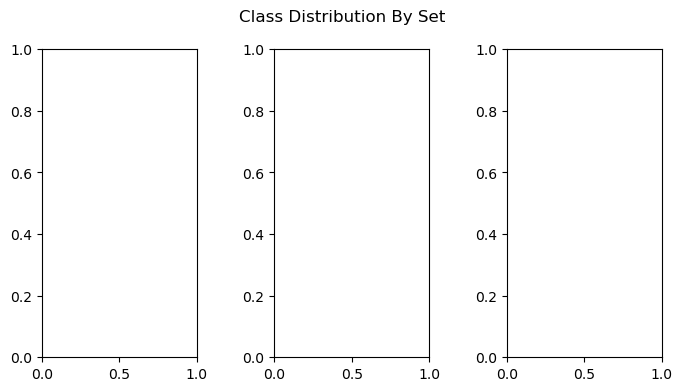

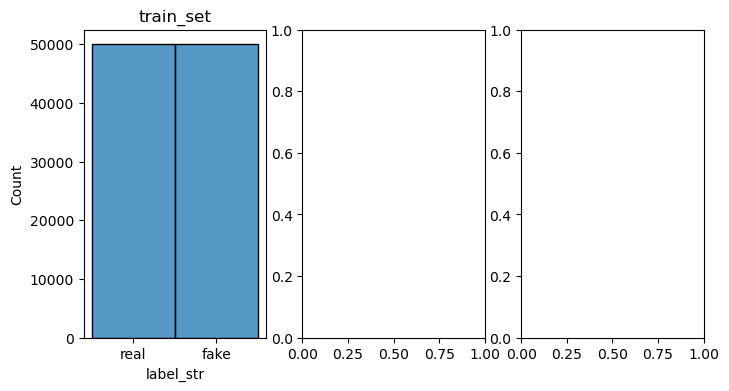

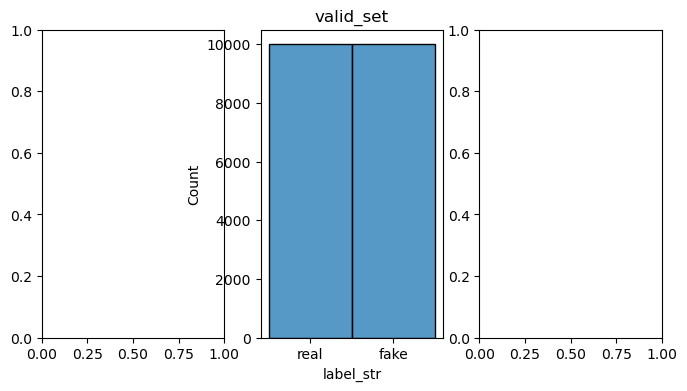

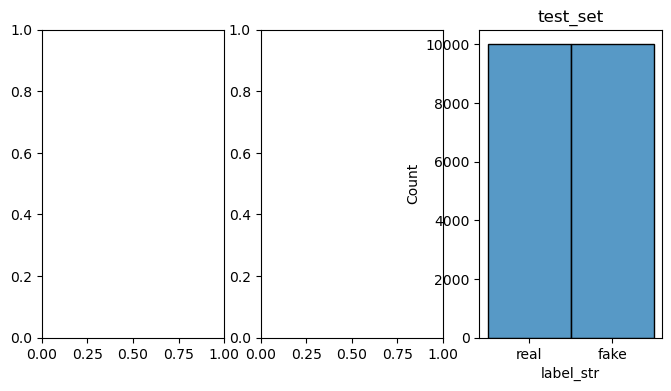

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
fig.subplots_adjust(hspace=0.30, wspace=0.5)
fig.suptitle('Class Distribution By Set')
title_list=['train_set','valid_set','test_set']
axis_list = [(0,0),(0,1),(0,2)]
for x in range(3):
    multi_hist_plot(df_list[x], 'label_str', x, title_list[x])

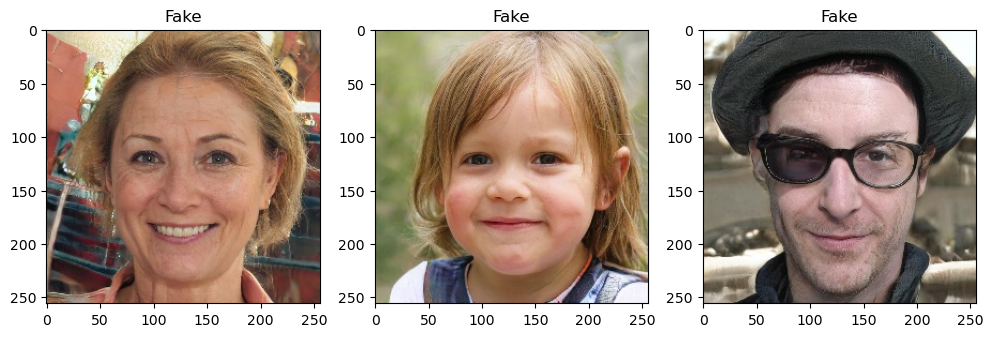

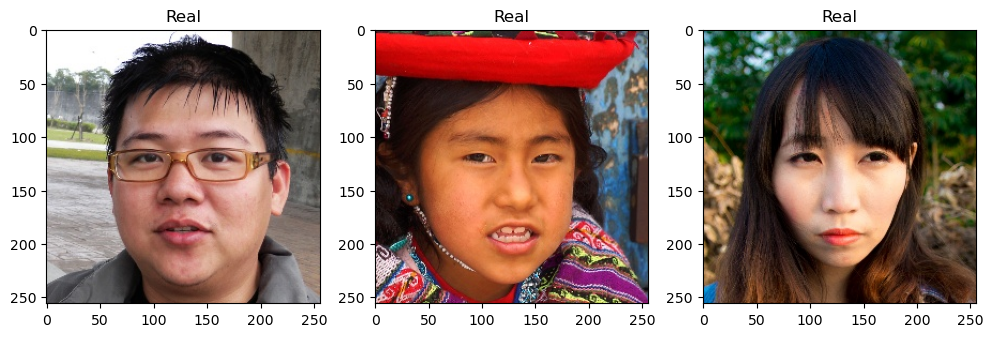

In [8]:
fake_images, real_images = sample_images('train',3)
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

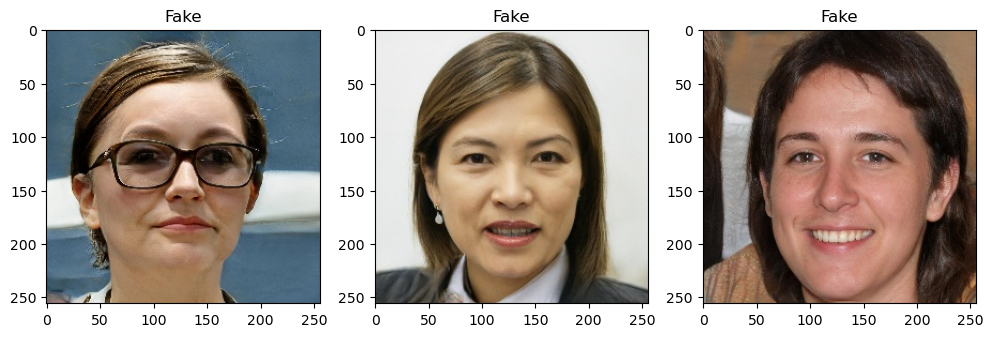

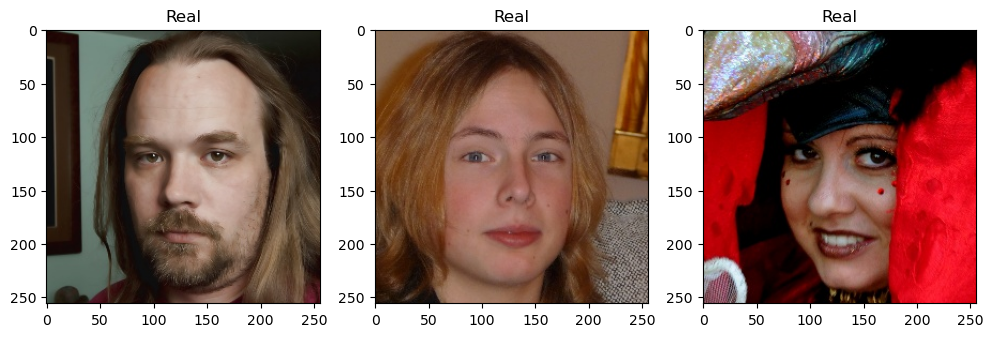

In [9]:
fake_images, real_images = sample_images('test',3)
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

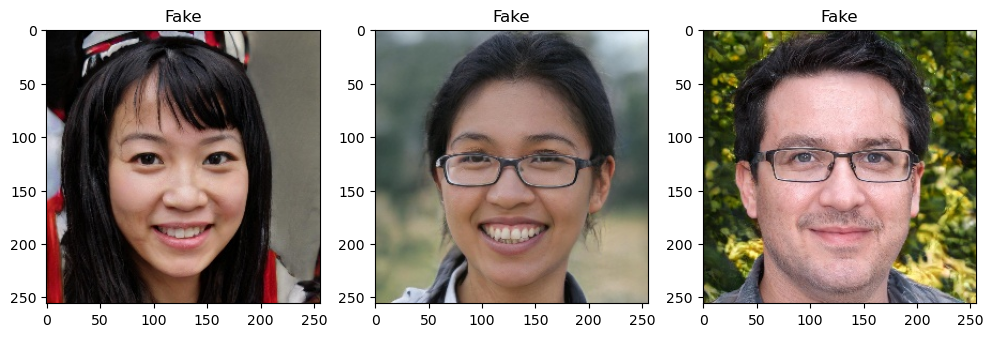

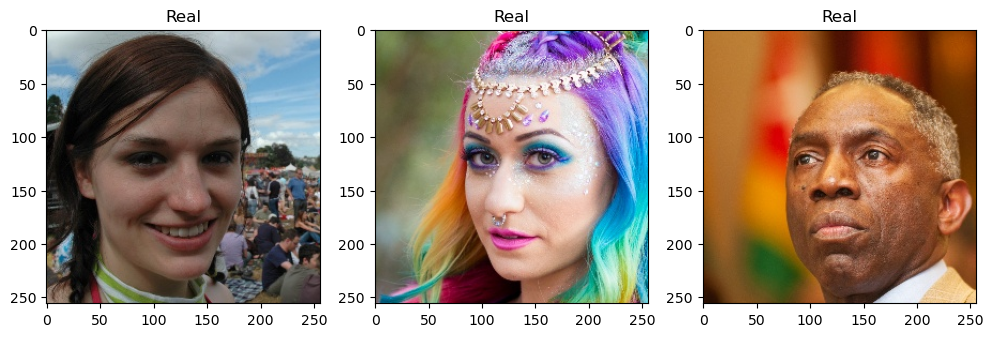

In [10]:
fake_images, real_images = sample_images('valid',3)
for x in ['fake', 'real']:
    plot_images(x, fake_images, real_images)

In [11]:
# Testing image sizes by set
train_path = train_meta['path'].sample(10).to_list()
valid_path = valid_meta['path'].sample(10).to_list()
test_path = test_meta['path'].sample(10).to_list()
for x in range(len(train_path)):
    sample_image = []
    sample_image.append(Image.open(f'./real_vs_fake/real-vs-fake/{train_path[x]}').size)
    print(sample_image)

[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]


In [12]:
for x in range(len(valid_path)):
    sample_image = []
    sample_image.append(Image.open(f'./real_vs_fake/real-vs-fake/{valid_path[x]}').size)
    print(sample_image)

[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]


In [13]:
for x in range(len(test_path)):
    sample_image = []
    sample_image.append(Image.open(f'./real_vs_fake/real-vs-fake/{test_path[x]}').size)
    print(sample_image)

[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]
[(256, 256)]


In [14]:
# testing for rgb or greyscale
train_path = train_meta['path'].sample(1).to_list()[0]
valid_path = valid_meta['path'].sample(1).to_list()[0]
test_path = test_meta['path'].sample(1).to_list()[0]          
train_image = Image.open(f'./real_vs_fake/real-vs-fake/{train_path}')
valid_image = Image.open(f'./real_vs_fake/real-vs-fake/{valid_path}')
test_image = Image.open(f'./real_vs_fake/real-vs-fake/{test_path}')
print(f'train_color = {train_image.getbands()}, valid_color = {valid_image.getbands()}, test_color = {test_image.getbands()}')

train_color = ('R', 'G', 'B'), valid_color = ('R', 'G', 'B'), test_color = ('R', 'G', 'B')


In [37]:
fake_images, real_images = sample_images('train',1)

In [38]:
fake_images, real_images

(['train/fake/B5UCFLP9M6.jpg'], ['train/real/18023.jpg'])

In [39]:
fake_image = Image.open(f'./real_vs_fake/real-vs-fake/{fake_images[0]}')
real_image = Image.open(f'./real_vs_fake/real-vs-fake/{real_images[0]}')

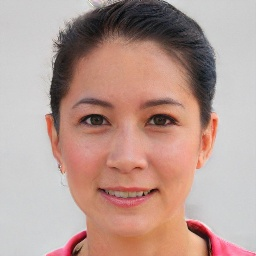

In [40]:
fake_image

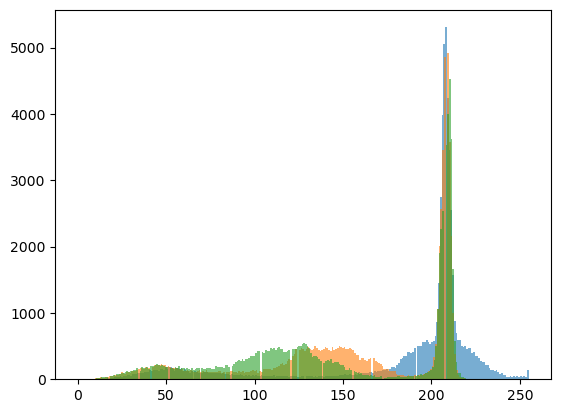

In [41]:
fake_array = np.array(fake_image)
for x in range(3):
    plt.hist(fake_array[:, :, x].ravel(), bins=256, color=f'C{x}', alpha=0.6)
plt.show()

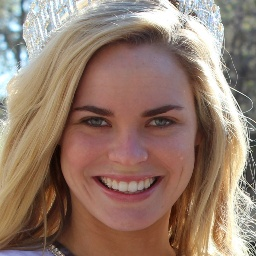

In [42]:
real_image

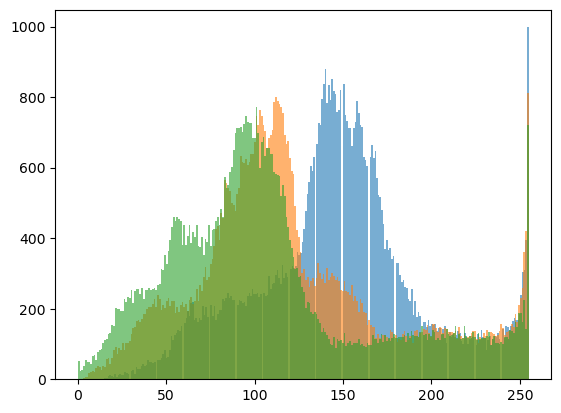

In [43]:
real_array = np.array(Image.open(f'./real_vs_fake/real-vs-fake/{real_images[0]}'))
for x in range(3):
    plt.hist(real_array[:, :, x].ravel(), bins=256, color=f'C{x}', alpha=0.6)
plt.show()

In [44]:
# Specify the base path where your image data is stored
base_path = './real_vs_fake/real-vs-fake/'

# Create an ImageDataGenerator for image preprocessing and augmentation
image_gen = ImageDataGenerator(rescale=1./255.)
# The 'rescale' parameter normalizes pixel values to the range [0, 1] by dividing each pixel value by 255

In [46]:
train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
# Create an ImageDataGenerator for the training set
train_gen = generation('train/')

# Create an ImageDataGenerator for the validation set
valid_gen = generation('valid/')

# Create an ImageDataGenerator for the test set with shuffling disabled
test_gen = generation('test/', shuffle=False)

In [53]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (224, 224, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
baseline = classifier.fit_generator(train_flow,
                         steps_per_epoch = len(train_flow),
                         epochs = 10,
                         validation_data = valid_flow)

/var/folders/d8/489yldc97211yqtsk2b1f_wc0000gn/T/ipykernel_83088/1731846182.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  baseline = classifier.fit_generator(train_flow,


Epoch 1/10


2023-12-04 09:45:04.376172: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 122s 78ms/step - loss: 0.4915 - accuracy: 0.7676 - val_loss: 0.3703 - val_accuracy: 0.8399
Epoch 2/10
1563/1563 [==============================] - 12409s 8s/step - loss: 0.3231 - accuracy: 0.8632 - val_loss: 0.3187 - val_accuracy: 0.8634
Epoch 3/10
1563/1563 [==============================] - 126s 81ms/step - loss: 0.2446 - accuracy: 0.8993 - val_loss: 0.2888 - val_accuracy: 0.8805
Epoch 4/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.1925 - accuracy: 0.9235 - val_loss: 0.2472 - val_accuracy: 0.9014
Epoch 5/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.1498 - accuracy: 0.9406 - val_loss: 0.2517 - val_accuracy: 0.9017
Epoch 6/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.1114 - accuracy: 0.9571 - val_loss: 0.2359 - val_accuracy: 0.9151
Epoch 7/10
1563/1563 [==============================] - 127s 82ms/step - loss: 0.0861 - accuracy: 0.9673 - val_loss: 0.2674 - val

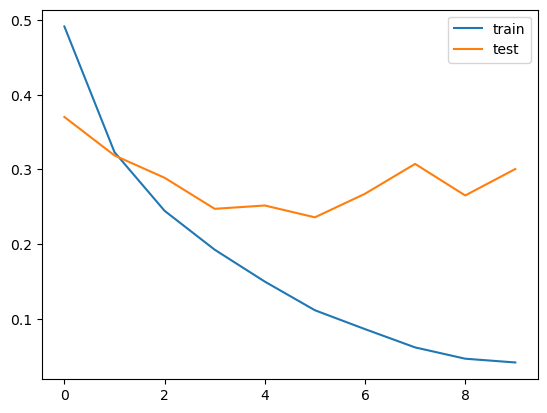

In [62]:
plt.plot(baseline.history['loss'], label='train')
plt.plot(baseline.history['val_loss'], label='test')
plt.legend()
plt.show()

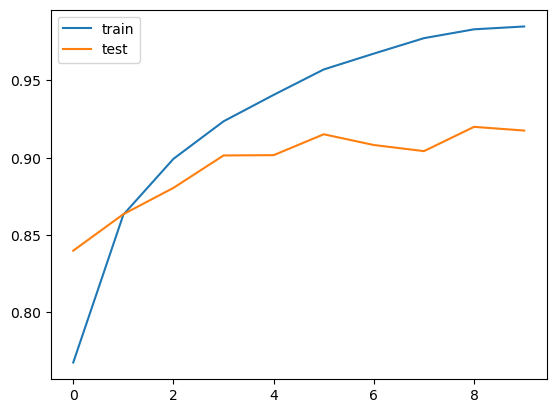

In [63]:
plt.plot(baseline.history['accuracy'], label='train')
plt.plot(baseline.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [64]:
y_true = test_flow.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [86]:
y_pred = baseline.model.predict(test_flow)

313/313 [==============================] - 18s 56ms/step


In [87]:
y_pred_labels = (y_pred < 0.5).astype(int)

In [88]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
confusion_matrix(y_true, y_pred_labels)

array([[5061, 4939],
       [5160, 4840]])

In [91]:
baseline_metric = classification_report(y_true, y_pred_labels)

In [92]:
train_32 = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
valid_32 = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
test_32 = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [93]:
# Initialising the CNN
classifier_32 = Sequential()

# Step 1 - Convolution
classifier_32.add(Convolution2D(32, 3, 3, input_shape = (224, 224, 3), activation = 'relu'))
# Step 2 - Pooling
classifier_32.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier_32.add(Flatten())
# Step 4 - Full connection
classifier_32.add(Dense(128, activation = 'relu'))
classifier_32.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier_32.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [95]:
baseline_32 = classifier_32.fit_generator(train_32,
                         steps_per_epoch = len(train_32),
                         epochs = 10,
                         validation_data = valid_32)

Epoch 1/10


/var/folders/d8/489yldc97211yqtsk2b1f_wc0000gn/T/ipykernel_83088/2445434311.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  baseline_32 = classifier_32.fit_generator(train_32,


3125/3125 [==============================] - 130s 42ms/step - loss: 0.4638 - accuracy: 0.7774 - val_loss: 0.3323 - val_accuracy: 0.8586
Epoch 2/10
3125/3125 [==============================] - 132s 42ms/step - loss: 0.2793 - accuracy: 0.8836 - val_loss: 0.3861 - val_accuracy: 0.8357
Epoch 3/10
3125/3125 [==============================] - 134s 43ms/step - loss: 0.1865 - accuracy: 0.9264 - val_loss: 0.2419 - val_accuracy: 0.9048
Epoch 4/10
3125/3125 [==============================] - 137s 44ms/step - loss: 0.1310 - accuracy: 0.9496 - val_loss: 0.2380 - val_accuracy: 0.9107
Epoch 5/10
3125/3125 [==============================] - 140s 45ms/step - loss: 0.0882 - accuracy: 0.9669 - val_loss: 0.2500 - val_accuracy: 0.9145
Epoch 6/10
3125/3125 [==============================] - 141s 45ms/step - loss: 0.0695 - accuracy: 0.9737 - val_loss: 0.2672 - val_accuracy: 0.9137
Epoch 7/10
3125/3125 [==============================] - 137s 44ms/step - loss: 0.0525 - accuracy: 0.9811 - val_loss: 0.2917 - val

In [ ]:
train_128 = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)
valid_128 = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)
test_128 = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=128,
    class_mode='binary'
)

In [ ]:
# Initialising the CNN
classifier_128 = Sequential()

# Step 1 - Convolution
classifier_128.add(Convolution2D(32, 3, 3, input_shape = (224, 224, 3), activation = 'relu'))
# Step 2 - Pooling
classifier_128.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier_128.add(Flatten())
# Step 4 - Full connection
classifier_128.add(Dense(128, activation = 'relu'))
classifier_128.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier_128.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
baseline_128 = classifier_128.fit(train_128,
                         steps_per_epoch = len(train_128),
                         epochs = 10,
                         validation_data = valid_128)